# Cyber attack dataset Analysis :
This notebook provides a description of the dataset Cyber_attacks (available in [Kaggle](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data))\
It supplies 40 000 synthetic records spread in 25 attributes, each row corresponding to an attack type : Malware, DDoS and Intrusion. These later are used by hackers\pirates to compromise a target's IT security by violating the integrity, confidentiality and availability of sensitive data such as personal, financial, industrial or security information.
- Malware is a  malicious software produced to damage a computer system (e.g. viruses, Trojans, ransomware),
 - DDoS (Distributed Denial of Service) is a set of computer attacks designed to overwhelm a server or network with a large number of requests, overloading it or rendering it unavailable,
  - Intrusion is an unauthorized accesses to a computer system to extract, modify or destroy data via security holes [1].\

These dataset records attacks occurred from January 1, 2020, to October 11, 2023.

The aim of the present notebook is to understand the 3 types of attack and their correlation with the attributes in order to  predict them using a machine learning approach.
To answer this goal, our study is organized in four parts:
1. Exploration of raw data
2. Features engineering
3. Prediction of future attacks
4. Conclusion

*This project describes group work by Victor Coppin, Damien Rondet, Sachiththa Konara Mudiyanselage, Hugo Carton, Nans Long and Naro Kuoch.*




Before to go deeply in details in the overview of our data set, we need to describe the attributes.
These later are described in the list below, from information of wikipedia :
- Timestamp: Attack date and schedule
- Source IP Address: Pirate IP Address
- Destination IP Address: Recipient IP Address IP
- Source Port:Port used by Pirate
- Destination Port: Port used by Host target
- Protocol: Network protocol used in the communication Pirate/Host target
- Packet Length: Packet size (bytes)
- Packet Type: Packet classification
- Traffic Type: Characterization of network traffic
- Payload Data: Data carried in the packet
- Malware Indicators: Signs of  Pirates software
- Anomaly Scores: Numerical score of  a suspicious behavior in comparison to control condition
- Alerts/Warnings: Security message to notify an unusual event
- Attack Type: Identification of a Pirate attack
- Attack Signature: Specific pattern of Pirate attack
- Action Taken: Defense responses
- Severity Level: Impact level of the event
- User Information: User informations
- Device Information: Device informations
- Network Segment: The part of the network touched by the attack
- Geo-location Data: Geographic location of Pirate
- Proxy Information: Proxy server IP address
- Firewall Logs: Recording of firewall activities
- IDS/IPS Alerts: Alerts from intrusion detection system/ intrusion prevention system
- Log Source: identifies the origin of a recorded event


 In our exploration of raw data, we performed an overview of data set without transformations or creations of new variables in order to see the relations between the attributes. For this purpose, we examined the device responses, then the network traffic category, and we finished with a temporal vision of all the survey.

# 1. Exploration of raw data

In [19]:
#Importing  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = 'Data/cybersecurity_attacks.csv'
df = pd.read_csv(dataset_path)

## 1.1   Evaluating the answer from the three different attack types

In first part, we decided to focus on device reactions (defense) induced by the three attack types.
To do this, we focused on **actions taken** in function of **attack types**.


### Action Taken

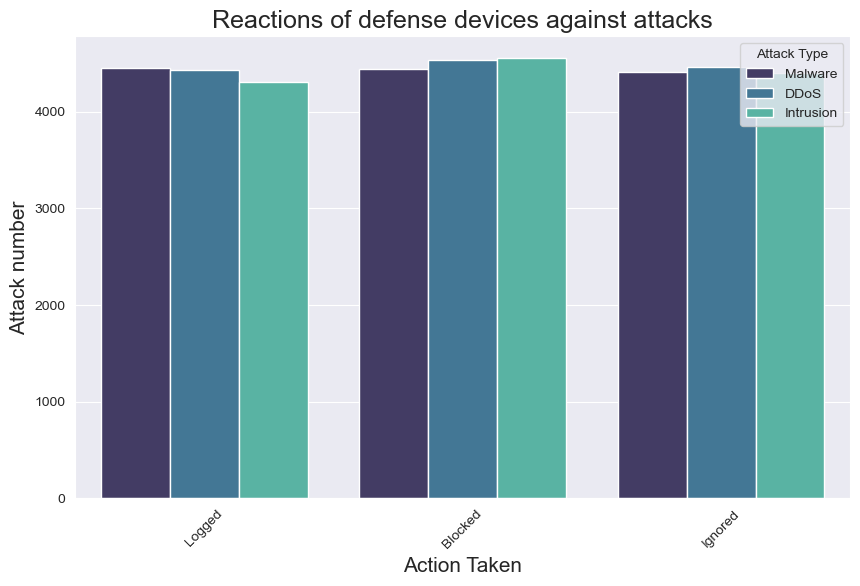

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Action Taken", hue="Attack Type", data=df, palette = "mako")
plt.title("Reactions of defense devices against attacks", fontsize=18)
plt.ylabel('Attack number', fontsize=15)
plt.xlabel("Action Taken", fontsize=15)
plt.xticks(rotation=45)
plt.show()



Among all modalities, we remarked the same defense responses, suggesting in our conditions that the three attacks types could activate the same device reactions. This result is not surprising according to previous definitions (nature type of attacks) because we supposed that attacks could induce different defense responses as  Malware by antivirus and DDoS or Intrusions by Firewalls  [1]).
In our case, there is no relationship between attack and the action taken by the devices.

### Severity level
To compare with the previous countplot, we tryed to determine the impact of each event using the severity level.

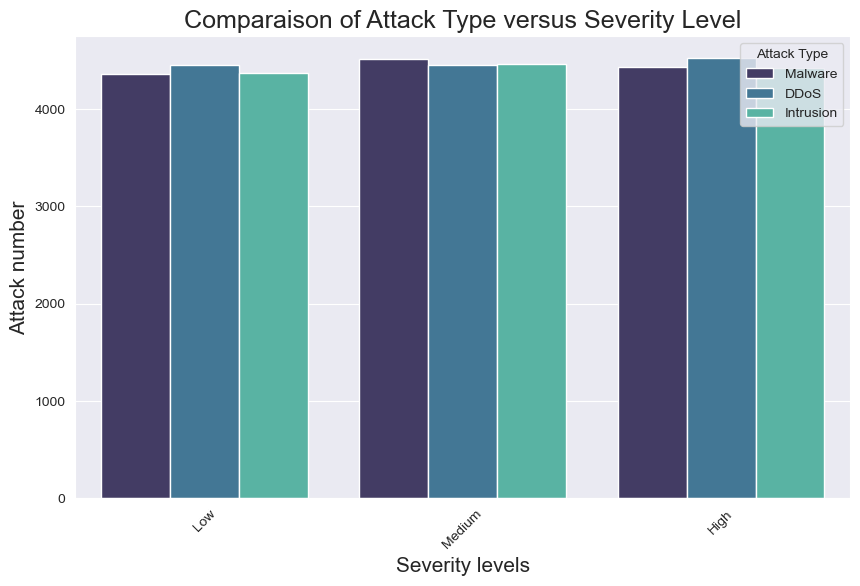

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity Level', hue='Attack Type', data=df, palette = "mako")
plt.title('Comparaison of Attack Type versus Severity Level', fontsize=18)
plt.ylabel('Attack number', fontsize=15)
plt.xlabel("Severity levels", fontsize=15)
plt.xticks(rotation=45)
plt.show()




As before, we detect the same signal between the modalities, suggesting an equivalent severity level induced by the three attack types on devices. This feature didn't provide enough details on the defense origin activated by the attack ( for instance : malware/antivirus, DDos/firewall, Intrusion/firewall-IDS/IPS).\
 To go further into this hypothesis we tried to visualize the relationship betwenn severity levels with the following values :  Firewall Logs, IDS/IPS Alerts, Malware Indicators

### Firewall Logs, IDS/IPS Alerts, Malware Indicators

Code is inspired from [seaborn barplots](https://seaborn.pydata.org/examples/palette_choices.html) :

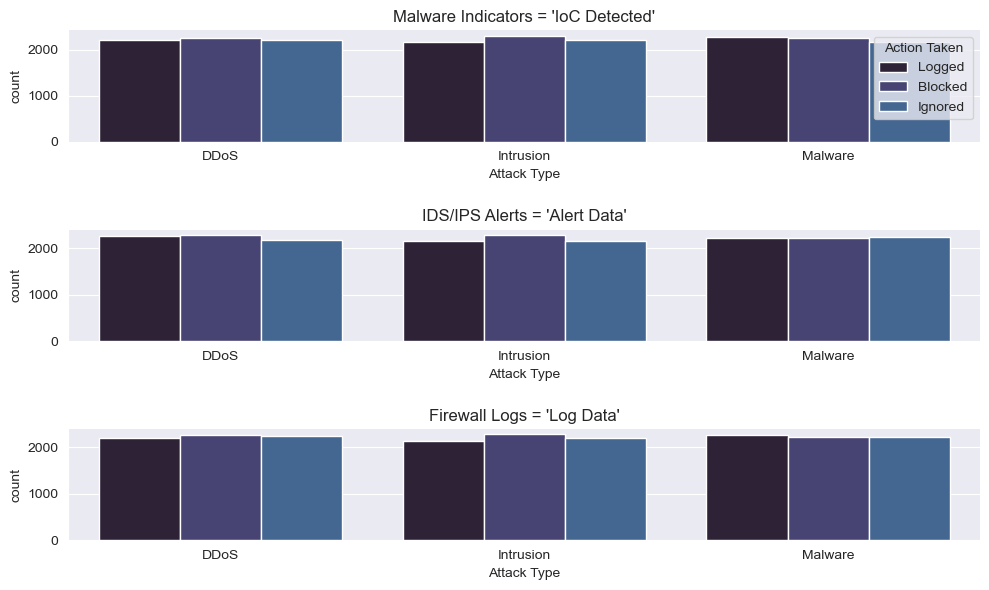

In [34]:
sns.set_palette("mako")

f,(ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

sns.countplot(x='Attack Type', hue='Action Taken', data=df[df['Malware Indicators'] == 'IoC Detected'], ax=ax1, order=['DDoS', 'Intrusion', 'Malware'])
ax1.set_title("Malware Indicators = 'IoC Detected'")

sns.countplot(x='Attack Type', hue='Action Taken', data=df[df['IDS/IPS Alerts'] == 'Alert Data'], ax=ax2, order=['DDoS', 'Intrusion', 'Malware'])
ax2.set_title("IDS/IPS Alerts = 'Alert Data'")

sns.countplot(x='Attack Type', hue='Action Taken', data=df[df['Firewall Logs'] == 'Log Data'], ax=ax3,order=['DDoS', 'Intrusion', 'Malware'])
ax3.set_title("Firewall Logs = 'Log Data'")
ax2.get_legend().remove()
ax3.get_legend().remove()
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()


### Anomaly score and destination ports

For Malware indicator: IoC Detected is an alert to identify a malware or a malicious activity by a device, suggesting it is not a specific malware indicator. We cannot exclude the combination between several attack types during one event (ex: botnet) as well as the false detections. \
For the two other parameters: \
Intrusion or Firewall could both be activated by all the three attack types [1].
Thus, our result suggests that the device parameters cannot be used separately to characterize the attack type, however, a combination of different features could help us to have more precise information about this malicious event.

Every digital device uses ports to receive and send data via the internet or a network.
The destination ports are, in our context, the ports in which packets containing malicious data are sent from the hacker to the target to exploit a host service or vulnerability.
For example, ports 80, 443, 8080 and 8443 are commonly used for DDoS attacks [3].
Malware is a computer program recognized mainly by antivirus and in few cases firewalls. It is correlated by high abnormal scores
compared to DDoS and intrusions, which are more challenging to detect because antivirus (designed for malware) are not able to accurately identify them. [1].
Given this information, we set out to determine in our data set whether there was a relationship between the
destination ports and the abnormal scores for suspicious events, depending on the attack types.


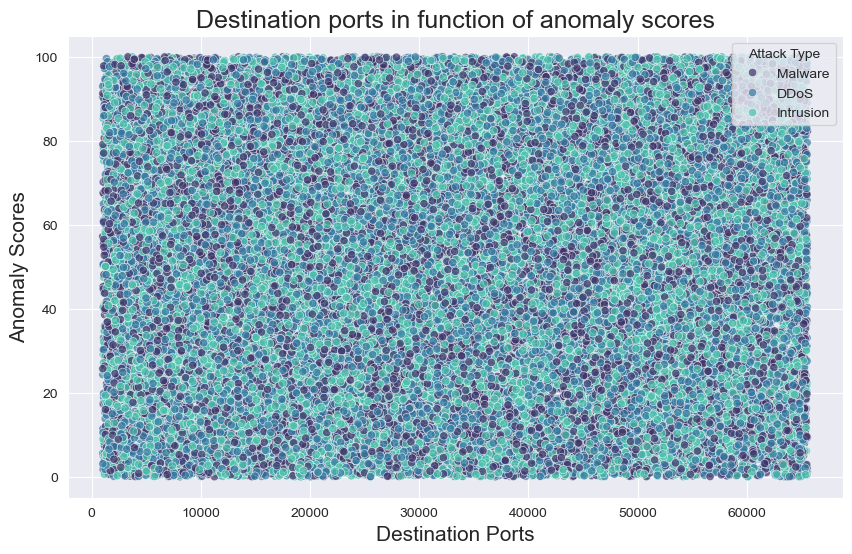

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Destination Port", y="Anomaly Scores", hue="Attack Type", data=df, palette="mako", alpha=0.7)
plt.title("Destination ports in function of anomaly scores", fontsize=18)
plt.xlabel("Destination Ports", fontsize=15)
plt.ylabel("Anomaly Scores", fontsize=15)
plt.legend(title="Attack Type", bbox_to_anchor=(1,1), loc="upper right")
plt.show()



The data presented in this scatterplot show a great diversity of values, which do not allow us to get clusters clearly defined by precise parameters. All the points are arranged heterogeneously across the whole figure, without showing any dependency between destination ports, abnormal scores and the type of attack.\
Thus, these results suggest the absence of relationships between these parameters in our data set.

## 1.2 Sensibility evaluation of attack type on the network traffic category

### Network segmentation

Network segmentation is an IT safeguard to prevent cyberattacks. It divides a computer park into subnetworks by assigning different access rights according to status to limit the exposure of sensitive data to personal who do not need to use this information (administrators versus Research unit for instance) [1].

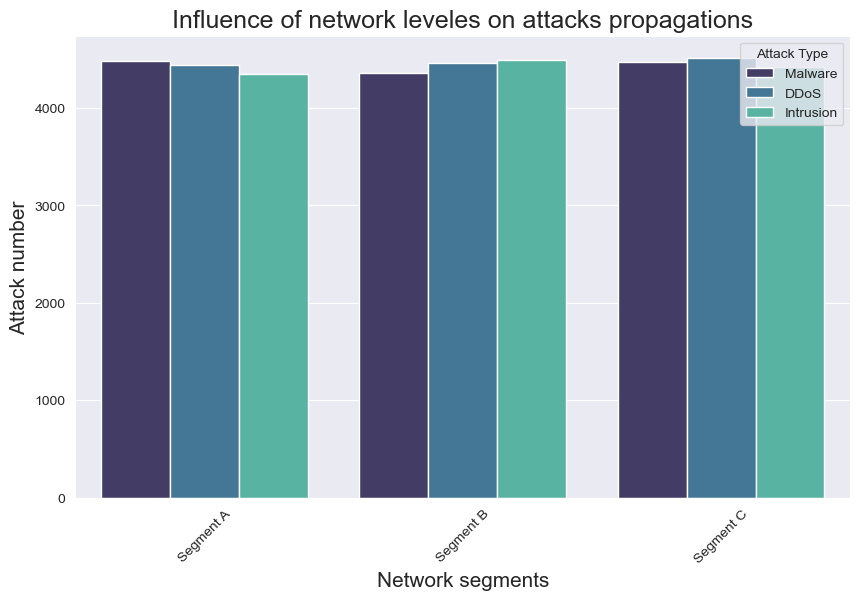

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Network Segment", hue="Attack Type", data=df, palette = "mako")
plt.title("Influence of network leveles on attacks propagations", fontsize=18)
plt.ylabel('Attack number', fontsize=15)
plt.xlabel("Network segments", fontsize=15)
plt.xticks(rotation=45)
plt.show()


In our context, we observed no influence of network segmentation on the type of attack.

### Protocols

The protocols define the different digital payload transfer methods between devices.
Under specific conditions, the pirates can hide their attacks by using some of them to hijack firewalls or other defense related responses.\
For example, ICMP is often used in intrusion contexts because they allow to scann all destinations port to find one of them which be open.\
The UDP and TCP protocols are also used for malware and DDos attacks [4 - 7].


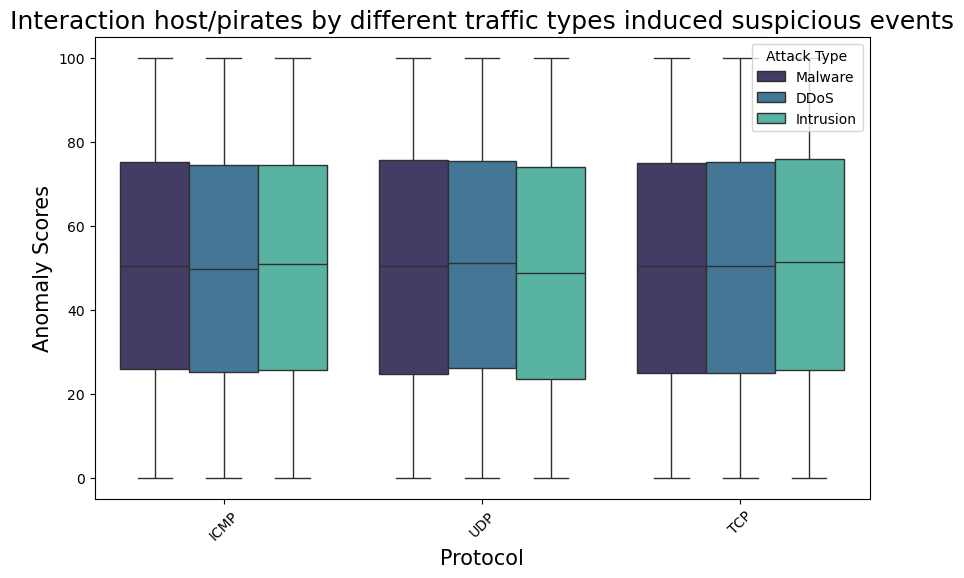

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Protocol", y="Anomaly Scores", hue="Attack Type", data=df , palette="mako")
plt.title("Interaction host/pirates by different traffic types induced suspicious events", fontsize=18)
plt.xlabel("Protocol", fontsize=15)
plt.ylabel("Anomaly Scores", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title="Attack Type")
plt.show()



All types of attack use the same type of traffic and induce the same quality of anomalous event detection, suggesting absence of interaction between the features.

### Traffic Type and packet length
The nature of the traffic is also another network parameter involved in data exchange. They describe the type of information which is transmitted between devices thanks to protocols.\
They can be safe (web browsing, e-mail) or dangerous (DDoS, data ex-filtration) depending on their behaviors or sources.\
Traffic type defines the priority and management of packets, data transmission units belonging to a communication flow, with the structure of an header (information needed to ensure proper routing, such as IP address, port, protocol, etc.), a payload (nature of the content) and a tail (error detection) [8].\
Packets can be vectors carrying malicious content capable of infecting devices via various types of traffic, some of which may be legitimate (i.e covert channels [9]).\
Depending on the type of attack, packets have different sizes, i.e. larger for DDoS than for malware. Generally, intrusions use smaller volumes of packets than the other two types of attack [1]. Thus the combination of packet and traffic type may indicate an attack or suspicious activity.

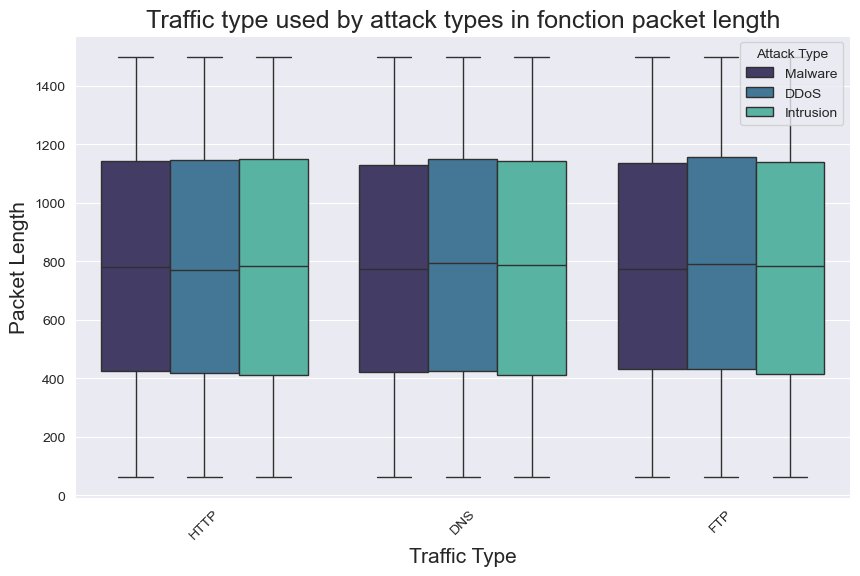

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Traffic Type", y="Packet Length", hue="Attack Type", data=df , palette="mako")
plt.title("Traffic type used by attack types in fonction packet length", fontsize=18)
plt.xlabel("Traffic Type", fontsize=15)
plt.ylabel("Packet Length", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title="Attack Type")
plt.show()

In our conditions, all type attacks used the same kind of traffic type with comparable packet length, suggesting no link between these parameters.

## 1.3 Temporal overview

To finish our data exploration, we focused on the timestamp to have a temporal macro vision of our study and try to see if some attack types have typical dates to isolate them. We made this figure to plot the trend of malware, DDoS and intuitions events during all the timestamp described by our data set.

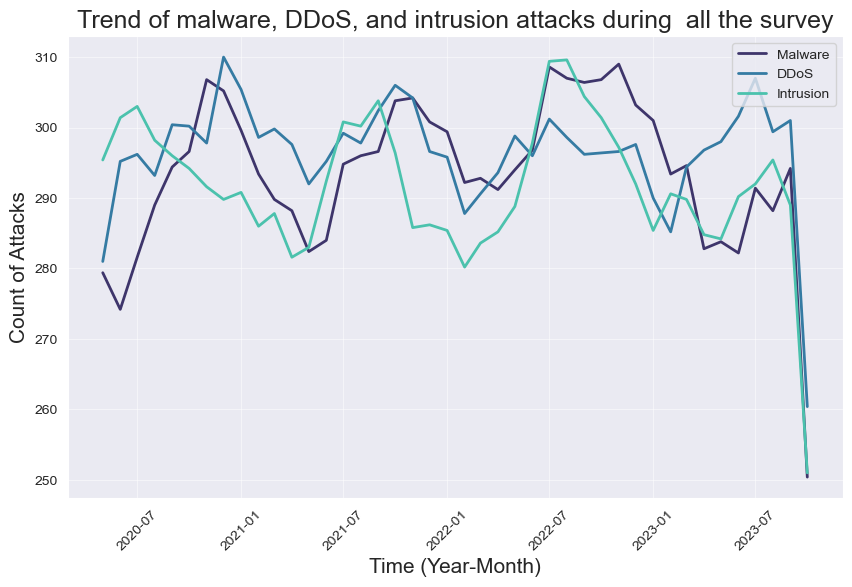

In [44]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['YearMonth'] = df['Timestamp'].dt.to_period('M')
attack_types = ['Malware', 'DDoS', 'Intrusion']
colors = sns.color_palette("mako", n_colors=len(attack_types))
plt.figure(figsize=(10, 6))

for i, attack in enumerate(attack_types):
    attack_data = df[df['Attack Type'] == attack].groupby('YearMonth').size().reset_index(name='AttackCount')
    attack_data['Mean'] = attack_data['AttackCount'].rolling(window=5).mean()
    attack_data['YearMonth'] = attack_data['YearMonth'].dt.to_timestamp()
    plt.plot(attack_data['YearMonth'], attack_data['Mean'], label=attack, linewidth=2, color=colors[i])


plt.title('Trend of malware, DDoS, and intrusion attacks during  all the survey', fontsize=18)
plt.xlabel('Time (Year-Month)', fontsize=15)
plt.ylabel('Count of Attacks', fontsize=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='upper right')
plt.grid(alpha=0.5)
plt.show()


Unfortunately, the curves have the same pattern during all the study. This result showed the time scale of our data set cannot be used to extract specific information on attack types.

## 1.4 Conclusions:
Our raw data exploration gives no obvious relations between the different attributes available due to the high variability levels of intra and inter features.
Therefore, we need to go further to understand our database. For example, we can transform and create new variables from the raw data or find new ones. These feature engineering steps could improve our analysis and maximize the chance to predict the attack types thanks to machine learning approach.
 Thus, the next part of this notebook describes in detail our feature enhancement before to start machine learning.

Bibliographical references:\
[1]: *"Il était une faille: Histoires marquantes de cybersécurité pour frissonner et s’en protéger"* by Marine Du Mesnil and Paul Molin, Ed. theodo\
[2]: https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data  \
[3]: https://blog.netwrix.fr/2023/07/20/liste-des-vulnerabilites-liees-aux-ports-ouverts/  \
[4]: https://fr.radware.com/security/ddos-knowledge-center/ddospedia/udp-flood/   \
[5]: https://www.paloaltonetworks.com/blog/2014/06/udp-malware-hiding-place-of-choice/   \
[6]: https://www.malwarepatrol.net/the-evolution-of-c2-communication-channels/  \
[7]: https://hogonext.com/how-to-detect-and-mitigate-tcp-based-ddos-attacks/   \
[8]: https://www.techtarget.com/searchnetworking/definition/packet  \
[9]: https://www.dst.defence.gov.au/sites/default/files/publications/documents/DST-Group-TN-1695.pdf
